In [94]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For regular expressions
import re

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

# Import NLTK and functions for tokenizations and n-grams
import nltk
nltk.download("punkt")
from nltk.util import ngrams
from nltk.corpus import names
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /home/ammar-asim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
train_df = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [96]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S


In [97]:
y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [98]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
X_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [100]:
test_df = pd.merge(X_test,y_test,how='inner',on='PassengerId')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.05,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.05,NaN,S,0


<Axes: xlabel='Survived', ylabel='count'>

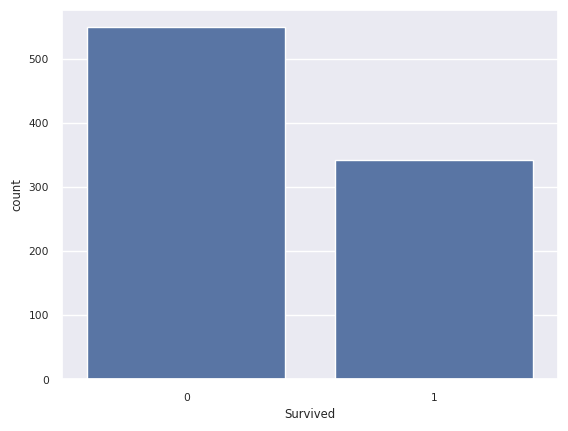

In [101]:
sns.countplot(data = train_df, x = "Survived")

<Axes: xlabel='Survived', ylabel='count'>

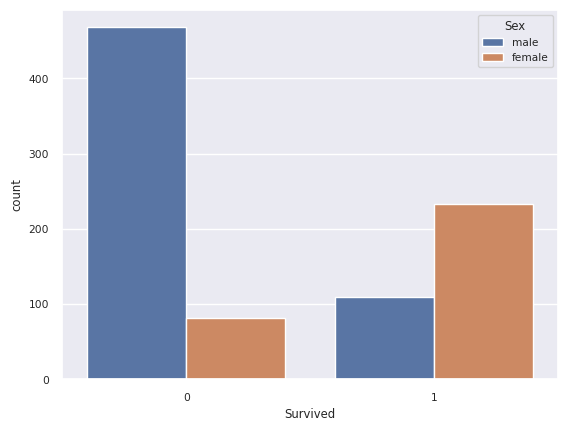

In [102]:
sns.countplot(data = train_df, x = "Survived", hue = "Sex")

<Axes: xlabel='Survived', ylabel='count'>

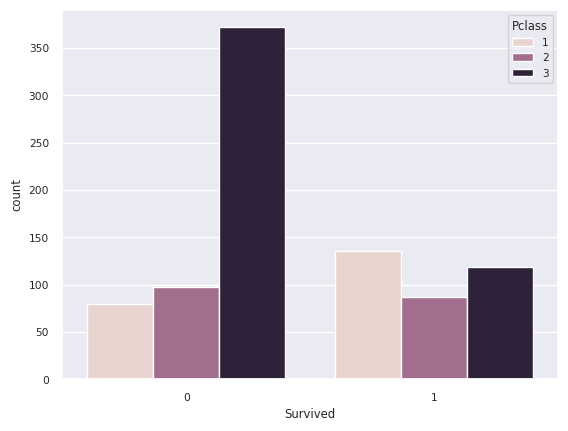

In [103]:
sns.countplot(data = train_df, x = "Survived", hue = "Pclass")

In [104]:
grouped_mean = train_df.select_dtypes(include = ["number"]).columns
grouped_mean = train_df.groupby(["Sex", "Pclass"])[grouped_mean].mean()
grouped_mean


PassengerId  Survived  Pclass   Age  SibSp  Parch   Fare
Sex    Pclass                                                          
female 1            469.21      0.97    1.00 34.61   0.55   0.46 106.13
       2            443.11      0.92    2.00 28.72   0.49   0.61  21.97
       3            399.73      0.50    3.00 21.75   0.90   0.80  16.12
male   1            455.73      0.37    1.00 41.28   0.31   0.28  67.23
       2            447.96      0.16    2.00 30.74   0.34   0.22  19.74
       3            455.52      0.14    3.00 26.51   0.50   0.22  12.66

In [105]:
children = train_df.query("Age < 18")
grouped_mean = children.select_dtypes(include = ["number"]).columns
grouped_mean = children.groupby(["Sex", "Pclass"])[grouped_mean].mean()
grouped_mean

PassengerId  Survived  Pclass   Age  SibSp  Parch   Fare
Sex    Pclass                                                          
female 1            525.38      0.88    1.00 14.12   0.50   0.88 104.08
       2            369.25      1.00    2.00  8.33   0.58   1.08  26.24
       3            374.94      0.54    3.00  8.43   1.57   1.06  18.73
male   1            526.50      1.00    1.00  8.23   0.50   2.00 116.07
       2            527.82      0.82    2.00  4.76   0.73   1.00  25.66
       3            437.95      0.23    3.00  9.96   2.07   1.00  22.75

Text(0, 0.5, 'Count')

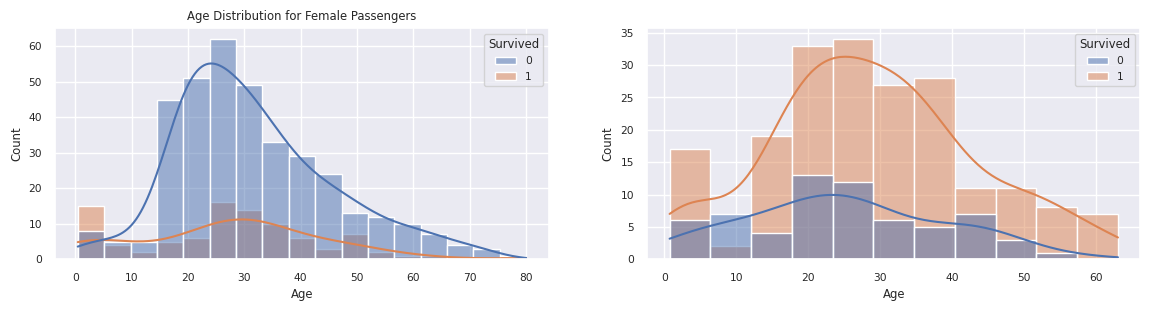

In [106]:
# Creating two histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# Define "male" and "female" with all missing values in column "Age" dropped
male = train_df.query("Sex == 'male'").dropna(subset = ["Age"])
female = train_df.query("Sex == 'female'").dropna(subset = ["Age"])

# Age Distribution for Male Passengers Survival
sns.histplot(data = male, x = "Age", hue = "Survived", kde = True, ax = ax1)
ax1.set_title("Age Distribution for Male Passengers")
ax1.set_xlabel("Age")
ax1.set_ylabel("Count")

# Age distribution for Female Passengers Survival 
sns.histplot(data = female, x = "Age", hue = "Survived", kde = True, ax = ax2)
ax1.set_title("Age Distribution for Female Passengers")
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")

<Axes: xlabel='Pclass', ylabel='Survived'>

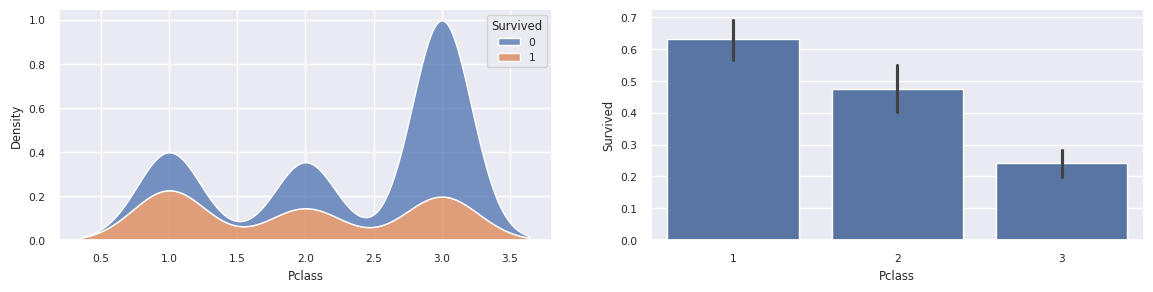

In [107]:
# Creating two graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

# This plot shows survival rate distribution by Class
sns.kdeplot(data = train_df, x = "Pclass", hue = "Survived", multiple="stack", ax = ax1)
sns.barplot(data = train_df, x = "Pclass", y = "Survived", ax = ax2)

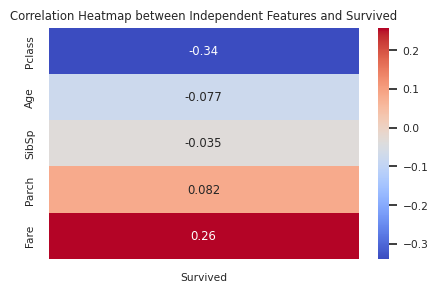

In [108]:
correlation_data = train_df.drop(['PassengerId'],axis=1).select_dtypes(include=['number']).corr().loc[["Pclass","Age","SibSp","Parch","Fare"], 'Survived']
plt.figure(figsize=(5, 3))
sns.set(font_scale=0.7)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Survived")
plt.show()

In [109]:
data = [train_df,test_df]

In [110]:
train_unique_passenger_id_count = train_df["PassengerId"].nunique()
print(f"Number of unique values in the training dataset column 'PassengerId' is {train_unique_passenger_id_count}")

# Testing dataset "PassengerID"
test_unique_passenger_id_count = test_df["PassengerId"].nunique()
print(f"Number of unique values in the testing dataset column 'PassengerId' is {test_unique_passenger_id_count}")

for dataset in data:
    dataset.drop(["PassengerId"], axis = 1, inplace = True)

print("-"* 100)

print("'PassengerId' column has been succesfully dropped on both train and test datasets")

Number of unique values in the training dataset column 'PassengerId' is 891
Number of unique values in the testing dataset column 'PassengerId' is 418
----------------------------------------------------------------------------------------------------
'PassengerId' column has been succesfully dropped on both train and test datasets


In [111]:
# Training dataset "Ticket"
train_unique_ticket_count = train_df["Ticket"].nunique()
print(f"Number of unique values in the training dataset column 'Ticket' is {train_unique_ticket_count}")

# Testing dataset "Ticket"
test_unique_ticket_count = test_df["Ticket"].nunique()
print(f"Number of unique values in the testing dataset column 'Ticket' is {test_unique_ticket_count}")

for dataset in data:
    dataset.drop(["Ticket"], axis = 1, inplace = True)

print("-"* 100)

print("'Ticket' column has been succesfully dropped on both train and test datasets")

Number of unique values in the training dataset column 'Ticket' is 681
Number of unique values in the testing dataset column 'Ticket' is 363
----------------------------------------------------------------------------------------------------
'Ticket' column has been succesfully dropped on both train and test datasets


In [112]:
# Training dataset "Fare"
train_missing_values_fare_count = train_df["Fare"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Fare' before feature engineering is {train_missing_values_fare_count}")

# Testing dataset "Fare"
test_missing_values_fare_count = test_df["Fare"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Fare' before feature engineering is {test_missing_values_fare_count}")

for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

Number of missing values in the training dataset column 'Fare' before feature engineering is 0
Number of missing values in the testing dataset column 'Fare' before feature engineering is 1


In [113]:
# Divide the "Fare" column into 6 equal-sized quantiles to categorize fare ranges
pd.qcut(train_df["Fare"], q = 6) 

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [114]:
# Categorize "Fare" column into six intervals based on results when categorizing fare ranges using "qcut" method
for dataset in data:
    dataset.loc[ dataset["Fare"] <= 7, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7) & (dataset["Fare"] <= 8), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 8) & (dataset["Fare"] <= 14), "Fare"]   = 2
    dataset.loc[(dataset["Fare"] > 14) & (dataset["Fare"] <= 26), "Fare"]   = 3
    dataset.loc[(dataset["Fare"] > 26) & (dataset["Fare"] <= 52), "Fare"]   = 4
    dataset.loc[dataset["Fare"] > 52, "Fare"] = 5
    dataset["Fare"] = dataset["Fare"].astype(int)

In [115]:
# Training dataset "Fare"
train_missing_values_fare_count = train_df["Fare"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Fare' after feature engineering is {train_missing_values_fare_count}")

# Testing dataset "Fare"
test_missing_values_fare_count = test_df["Fare"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Fare' after feature engineering is {test_missing_values_fare_count}")

Number of missing values in the training dataset column 'Fare' after feature engineering is 0
Number of missing values in the testing dataset column 'Fare' after feature engineering is 0


In [116]:
# Dictionary to map "mapping_sex_column" letters to numerical values
mapping_sex_column = {"male": 0,"female": 1}

# Map "Sex" column from the dictionary "mapping_sex_column"
for dataset in data:
  dataset["Sex"] = dataset["Sex"].map(mapping_sex_column)

print("Mapping in the 'Sex' column has been successfully completed: 0 for male and 1 for female.")

Mapping in the 'Sex' column has been successfully completed: 0 for male and 1 for female.


<Axes: xlabel='Relatives', ylabel='Survived'>

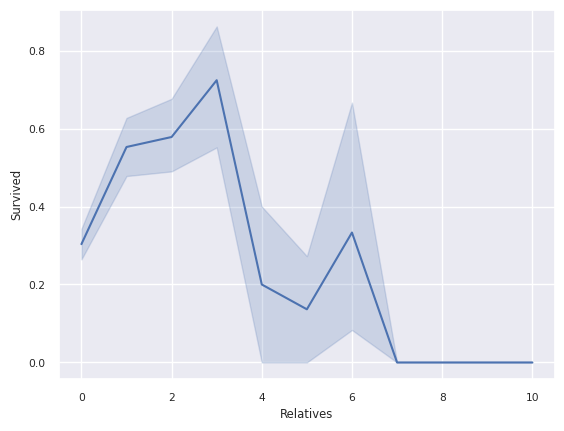

In [117]:
# "SibSp" represents the number of siblings/spouses aboard, and "Parch" represents the number of parents/children aboard.
# Combining these two columns to create a new column called "Relatives" to indicate if the passenger has relatives on board the Titanic.
for dataset in data:
    dataset["Relatives"] = dataset["SibSp"] + dataset["Parch"]
    
# This function will be used for the "Not Alone" column 
def not_alone(relative):
    if relative > 0:
        return 0   # Passenger has relatives
    else:
        return 1   # Passenger has no relatives

# Applying function "Not Alone"    
for dataset in data:
    dataset["Not Alone"] = dataset["Relatives"].apply(not_alone)
    
# Plotting graph
sns.lineplot(data = train_df, x = "Relatives", y = "Survived")


In [118]:
# Import the Image and display functions from IPython.display
from IPython.display import Image, display

# Displaying the image
display(Image(url="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png"))

In [119]:
# The image above displays certain decks that are to specific classes
# Upper decks (A, B, C) | Middle decks (D, E) | Lower decks (F, G)

# Dictionary to map "mapping_deck_column" letters to numerical values
mapping_deck_column = {"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7,"U": 8}

# The "Deck" column is extracted from the "Cabin" column. For instance, if the "Cabin" is D45, the corresponding "Deck" would be D
for dataset in data:
  dataset["Cabin"] = dataset["Cabin"].fillna("U0")  # Fill missing values with "U0"
  dataset["Deck"] = dataset["Cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())  # Extracting letter
  dataset["Deck"] = dataset["Deck"].map(mapping_deck_column) # Map "Deck" column from the dictionary "mapping_deck_column"
  dataset["Deck"] = dataset["Deck"].fillna(0)  # Fill missing values with "0"
  dataset["Deck"] = dataset["Deck"].astype(int)  # Convert column "Deck" to integer
  dataset.drop(["Cabin"], axis = 1, inplace = True)  # Dropping the "Cabin" column

print("The 'Deck' column has been successfully created by extracting the letter from the 'Cabin' column.")

The 'Deck' column has been successfully created by extracting the letter from the 'Cabin' column.


In [120]:
# Training dataset "Age"
train_missing_values_age_count = train_df["Age"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Age' before feature engineering is {train_missing_values_age_count}")

# Testing dataset "Age"
test_missing_values_age_count = test_df["Age"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Age' before feature engineering is {test_missing_values_age_count}")

# Filling up missing values in "Age" column between lower bound (mean - std) and upper bound (mean + std)
for dataset in data:
    mean = train_df["Age"].mean()  # Calculate the mean
    std = train_df["Age"].std()  # Calculate the standard deviation
    is_null = dataset["Age"].isnull().sum()  # Calculating the total number of missing values between "train_df" and "test_df"

    # Compute random numbers between the mean and std, and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
 
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice.astype(int)  # Convert to integers

print("-"* 100)

# Training dataset "Age"
train_missing_values_age_count = train_df["Age"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Age' after feature engineering is {train_missing_values_age_count}")

# Testing dataset "Age"
test_missing_values_age_count = test_df["Age"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Age' after feature engineering is {test_missing_values_age_count}")


Number of missing values in the training dataset column 'Age' before feature engineering is 177
Number of missing values in the testing dataset column 'Age' before feature engineering is 86
----------------------------------------------------------------------------------------------------
Number of missing values in the training dataset column 'Age' after feature engineering is 0
Number of missing values in the testing dataset column 'Age' after feature engineering is 0


In [121]:
for dataset in data:
    dataset["Age"] = dataset["Age"].astype(int)
    dataset.loc[dataset["Age"] <= 11, "Age"] = 0
    dataset.loc[(dataset["Age"] > 11) & (dataset["Age"] <= 18), "Age"] = 1
    dataset.loc[(dataset["Age"] > 18) & (dataset["Age"] <= 22), "Age"] = 2
    dataset.loc[(dataset["Age"] > 22) & (dataset["Age"] <= 27), "Age"] = 3
    dataset.loc[(dataset["Age"] > 27) & (dataset["Age"] <= 33), "Age"] = 4
    dataset.loc[(dataset["Age"] > 33) & (dataset["Age"] <= 40), "Age"] = 5
    dataset.loc[(dataset["Age"] > 40) & (dataset["Age"] <= 66), "Age"] = 6
    dataset.loc[dataset["Age"] > 66, "Age"] = 7

In [122]:
train_df['Age'].value_counts()

Age
4    162
5    154
6    151
3    141
2    112
1     96
0     68
7      7
Name: count, dtype: int64

In [123]:
# Training dataset "Embarked"
train_missing_values_embarked_count = train_df["Embarked"].isnull().sum()
print(f"Number of missing values in the training dataset column 'Embarked' is {train_missing_values_embarked_count}")

# Testing dataset "Embarked"
test_missing_values_embarked_count = test_df["Embarked"].isnull().sum()
print(f"Number of missing values in the testing dataset column 'Embarked' is {test_missing_values_embarked_count}")

# Most frequent value in "Embarked"
train_embarked_count = train_df["Embarked"].mode()[0]
print(f"Most frequent value repeated in column 'Embarked' is {train_embarked_count}")

# Filling missing values with the most frequent value in column "Embarked"
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

# Dictionary to map "Embarked" letters to numerical values
mapping_embarked_column = {"S": 0, "C": 1, "Q": 2}

# Map "Embarked" column from the dictionary "mapping_embarked_column"
for dataset in data:
  dataset["Embarked"] = dataset["Embarked"].map(mapping_embarked_column)

print("-"* 100)

# Count the occurrences of each unique value in the "Embarked" column for training dataset
# "S" is 0, "C" is 1, and "Q" is 2
train_df["Embarked"].value_counts()

Number of missing values in the training dataset column 'Embarked' is 2
Number of missing values in the testing dataset column 'Embarked' is 0
Most frequent value repeated in column 'Embarked' is S
----------------------------------------------------------------------------------------------------


Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [124]:
# Function "data_cleaning"
def data_cleaning(text):
    # Remove all special characters
    text = re.sub("[^\w\s]", " ", text)
    # Convert all text to lower case
    text = text.lower()
    # Condense multiple spaces into one
    text = re.sub("\s+", " ", text)
    return text

# Apply "data_cleaning" function to dataset
for dataset in data:
    dataset["clean_name"] = dataset["Name"].apply(data_cleaning)

In [125]:
# Define column "clean_name" from training dataset as "name"
name = train_df["clean_name"]

# Join the elements of the Series into a single string
name = ' '.join(name)

# Breaking strings into indivisual words
token = word_tokenize(name)

# Creating unigrams from a list of tokens (indivisual words)
name_unigram = list(ngrams(token, 1))

# Calculating the frequency distribution of unigrams
name_unigram_freq = nltk.FreqDist(name_unigram)

# Converting frequency distrubiton of unigrams into dictionary
name_unigram_freq_dict = dict(name_unigram_freq)

In [126]:
# Converting unigrams dictionary into a dataframe with indivisual words and count per word
name_unigram_freq_df = pd.DataFrame({"words": name_unigram_freq_dict.keys() ,"count":  name_unigram_freq_dict.values()})

# Sorting the DataFrame by word count in descending order
name_unigram_freq_df = name_unigram_freq_df.sort_values(by = "count", ascending = False)

# Removing special characters from column "words"
name_unigram_freq_df["words"] = name_unigram_freq_df["words"].astype(str).str.replace(r"[^\w\s]", "", regex=True)

In [127]:
nltk.download('names')
# List of male and female names in lowercase
all_names = set(name.lower() for name in names.words())

# Function to remove English names
def remove_names(text):
    if not isinstance(text, str):
        return text
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in [name.lower() for name in all_names]]
    return ' '.join(cleaned_words)

# Apply "remove_names" function to "name_unigram_freq_df"
name_unigram_freq_df["words"] = name_unigram_freq_df["words"].apply(remove_names)

# Removing all rows that contain blank entries not recognized as missing values
name_unigram_freq_df = name_unigram_freq_df[(name_unigram_freq_df != "").all(axis=1)]
name_unigram_freq_df

[nltk_data] Downloading package names to /home/ammar-asim/nltk_data...
[nltk_data]   Package names is already up-to-date!


,words,count
1,mr,521
12,miss,182
5,mrs,129
29,master,40
205,jr,10
...,...,...
1515,markun,1
1514,imanita,1
1512,alexenia,1
1511,potter,1


In [128]:
# Top 4 words to be used as "Titles"
titles = ["Mr","Miss","Mrs","Master"]
titles_mapping_column = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}

# Function to extract the title
def extract_title(name):
    for t in titles:
        if t in name:
            return t
    return "Other"

for dataset in data:
  dataset["Title"] = dataset["Name"].apply(extract_title)
  dataset["Title"] = dataset["Title"].map(titles_mapping_column)
  dataset.drop(["Name"], axis = 1, inplace = True)

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Survived    891 non-null    int64 
 1   Pclass      891 non-null    int64 
 2   Sex         891 non-null    int64 
 3   Age         891 non-null    int64 
 4   SibSp       891 non-null    int64 
 5   Parch       891 non-null    int64 
 6   Fare        891 non-null    int64 
 7   Embarked    891 non-null    int64 
 8   Relatives   891 non-null    int64 
 9   Not Alone   891 non-null    int64 
 10  Deck        891 non-null    int64 
 11  clean_name  891 non-null    object
 12  Title       891 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 90.6+ KB


In [130]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not Alone,Deck,clean_name,Title
0,0,3,0,2,1,0,0,0,1,0,8,braund mr owen harris,1
1,1,1,1,5,1,0,5,1,1,0,3,cumings mrs john bradley florence briggs thayer,1
2,1,3,1,3,0,0,0,0,0,1,8,heikkinen miss laina,2
3,1,1,1,5,1,0,5,0,1,0,3,futrelle mrs jacques heath lily may peel,1
4,0,3,0,5,0,0,1,0,0,1,8,allen mr william henry,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,2,0,0,1,8,montvila rev juozas,5
887,1,1,1,2,0,0,4,0,0,1,2,graham miss margaret edith,2
888,0,3,1,4,1,2,3,0,3,0,8,johnston miss catherine helen carrie,2
889,1,1,0,3,0,0,4,1,0,1,3,behr mr karl howell,1


In [131]:
# Define "train_X"
train_df = train_df.select_dtypes(exclude=["object"])
train_X = train_df.iloc[:,1:]

In [132]:
train_X.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not Alone,Deck,Title
219,2,0,4,0,0,2,0,0,1,8,1


In [133]:
train_y = train_df.iloc[:,0]
train_y.sample()

166    1
Name: Survived, dtype: int64

In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pclass      418 non-null    int64 
 1   Sex         418 non-null    int64 
 2   Age         418 non-null    int64 
 3   SibSp       418 non-null    int64 
 4   Parch       418 non-null    int64 
 5   Fare        418 non-null    int64 
 6   Embarked    418 non-null    int64 
 7   Survived    418 non-null    int64 
 8   Relatives   418 non-null    int64 
 9   Not Alone   418 non-null    int64 
 10  Deck        418 non-null    int64 
 11  clean_name  418 non-null    object
 12  Title       418 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 42.6+ KB


In [135]:
# Define "test_X"
test_df = test_df.select_dtypes(exclude=["object"])
test_X = test_df.drop('Survived',axis=1)
test_X.sample()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Not Alone,Deck,Title
237,3,0,2,0,0,0,1,0,1,8,1


In [139]:
# Define "test_y"
test_y = test_df['Survived']
test_y.sample()

121    0
Name: Survived, dtype: int64

In [141]:
# Import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifierCV

# Define RidgeClassifierCV 
model = RidgeClassifierCV()

# Fit the Model to the training data
model.fit(train_X, train_y)

# Make predictions on the test data
y_predict = model.predict(test_X)

# Import the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Calculate 
accuracy = accuracy_score(test_y, y_predict)
precision = precision_score(test_y, y_predict)
recall = recall_score(test_y, y_predict)
f1 = f1_score(test_y, y_predict)
mcc = matthews_corrcoef(test_y, y_predict)
conf_matrix = confusion_matrix(test_y, y_predict)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9760765550239234
Precision: 0.9671052631578947
Recall: 0.9671052631578947
F1 Score: 0.9671052631578947
Matthews Correlation Coefficient (MCC): 0.9483082706766918
Confusion Matrix:
 [[261   5]
 [  5 147]]


Text(0, 0.5, 'True Label')

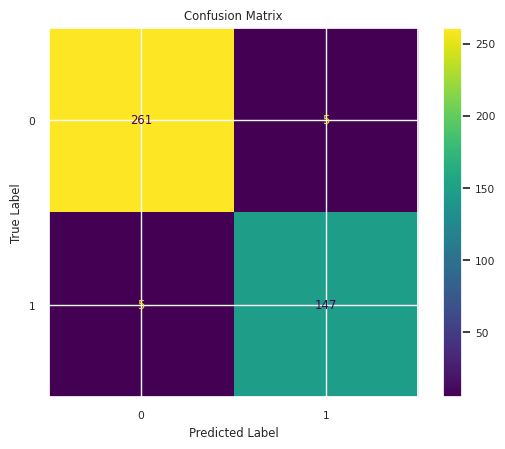

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix for the test set predictions
cm = confusion_matrix(test_y, y_predict)

# Get the class labels from the model
labels = model.classes_

# Create a ConfusionMatrixDisplay object with the calculated confusion matrix and class labels
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)

# Plot the confusion matrix
matrix.plot()
matrix.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [143]:
# Import gender submission file
gender_submission = pd.read_csv("gender_submission.csv")

In [144]:
submission = pd.DataFrame()

PassengerId = gender_submission["PassengerId"]
submission["PassengerId"] = PassengerId
submission['Survived'] = y_predict

submission.head()
submission.to_csv("Submission.csv", index=False)